In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



<table>
<th>

<span style="font-size:30px; font-family:Arial;color:orange">LEGEND</span>
</th>

<tr><td><span style="font-size:50px; font-family:Arial;color:red">Analysis Steps in Red color</span></td></tr>
<tr><td><span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span></td></tr>
<tr><td><span style="font-size:25px; font-family:Arial;color:#8DDBF2">These are insights got from analysing the data, in Blue color</span></td></tr>
<tr><td>''' ''' code sections are notes to self, some quick code snippets, or some notes while doing analysis</td></tr>
</table>



In [69]:
''' Notes to Self
my markdown templates
<span style="font-size:50px; font-family:Arial;color:red">Use this for heading/span><li>
<span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span><li>
<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Use this for insight </span><li>
'''

' Notes to Self\nmy markdown templates\n<span style="font-size:50px; font-family:Arial;color:red">Use this for heading/span><li>\n<span style="font-size:30px; font-family:Arial;color:orange">Sub Headings in orange color</span><li>\n<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Use this for insight </span><li>\n'

<span style="font-size:50px; font-family:Arial;color:red">Step 1: Understanding the Problem and the Data</span>


About Aerofit
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

Business Problem
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



Key points:
1. WHAT: identify the characteristics of the target audience for each type of treadmill offered
2. WHY: to provide a better recommendation of the treadmills to the new customers


Dataset
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. 


<span style="font-size:50px; font-family:Arial;color:red">Step 2: Import and Inspect the Data</span>

In [70]:
''' 
Notes to Self
During this step, looking into the statistics is critical to gain initial know-how of its structure, variable kinds, and capability issues.

'''


' \nNotes to Self\nDuring this step, looking into the statistics is critical to gain initial know-how of its structure, variable kinds, and capability issues.\n\n'

In [71]:
df =pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [72]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<span style="font-size:30px; font-family:Arial;color:orange">Statistical summary for numerical columns and Unique values for categorical data

In [73]:
#Instead of manually creating tables and collecting values
#lets automate it.
#We will generate a table of all columns in Markdown format 
#We will paste this table into a markdown cell and then we may add additional analysis
#!pip install tabulate
from tabulate import tabulate
def generate_markdown_table_with_details(df):
    column_details = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        if df[col].dtype == 'object':
            cat_or_num = 'Categorical'
            details = df[col].unique().tolist()
        else:
            cat_or_num = 'Numerical'
            details = f"Min: {df[col].min()}, Max: {df[col].max()}"
        column_details.append([col, dtype, cat_or_num, details, ''])

    # Create a DataFrame for the table
    table_df = pd.DataFrame(column_details, columns=['Column Name', 'Data Type', 'Categorical or Numerical', 'Details', 'Business Description(fill manually)'])

    # Convert DataFrame to Markdown
    markdown_table = tabulate(table_df, headers='keys', tablefmt='pipe', showindex=False)
    return markdown_table

markdown_table = generate_markdown_table_with_details(df)
print(f'There are a total of {df.shape[0]} rows and {df.shape[1]} columns')
print(markdown_table)


There are a total of 180 rows and 9 columns
| Column Name   | Data Type   | Categorical or Numerical   | Details                     | Business Description(fill manually)   |
|:--------------|:------------|:---------------------------|:----------------------------|:--------------------------------------|
| Product       | object      | Categorical                | ['KP281', 'KP481', 'KP781'] |                                       |
| Age           | int64       | Numerical                  | Min: 18, Max: 50            |                                       |
| Gender        | object      | Categorical                | ['Male', 'Female']          |                                       |
| Education     | int64       | Numerical                  | Min: 12, Max: 21            |                                       |
| MaritalStatus | object      | Categorical                | ['Single', 'Partnered']     |                                       |
| Usage         | int64       | Numeric

In [74]:
''' 
Notes to Self
Adding insights about columns and data size.  
We identify which columns are numerical, which are categorical
Within categorical, we identify if it is nominal or ordinal data.  This helps us to decide best graph to use 
Also ordinal data can be converted into numeric using codes thereby making it available for some kind of graphs.
'''

' \nNotes to Self\nAdding insights about columns and data size.  \nWe identify which columns are numerical, which are categorical\nWithin categorical, we identify if it is nominal or ordinal data.  This helps us to decide best graph to use \nAlso ordinal data can be converted into numeric using codes thereby making it available for some kind of graphs.\n'

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">There are a total of 180 rows and 9 columns</span>


| Column Name   | Data Type   | Categorical or Numerical   | Details                     | Business Description   |
|:--------------|:------------|:---------------------------|:----------------------------|:-----------------------|
| Product       | object      | Cat(Nominal)                 | ['KP281', 'KP481', 'KP781'] | In years                       |
| Age           | int64       | Numerical                  | Min: 18, Max: 50            |                        |
| Gender        | object      | Cat(Nominal)                | ['Male', 'Female']          |                        |
| Education     | int64       | Cat(Ordinal)                  | Min: 12, Max: 21            | In years                      |
| MaritalStatus | object      | Cat(Nominal)                 | ['Single', 'Partnered']     |                        |
| Usage         | int64       | Cat(Ordinal)                   | Min: 2, Max: 7              | The average number of times the customer plans to use the treadmill each week                      |
| Fitness       | int64       | Cat(Ordinal)                   | Min: 1, Max: 5              | Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape                      |
| Income        | int64       | Numerical                  | Min: 29562, Max: 104581     | Annual income (in $)                       |
| Miles         | int64       | Numerical                  | Min: 21, Max: 360           | The average number of miles the customer expects to walk/run each week                       |



In [75]:
''' 
Notes to Self
Let's get a quick summary of the dataset using the pandas describe() method. 
The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. 
Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.
'''
df.describe(include ='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


<span style="font-size:50px; font-family:Arial;color:red">Step 3: Handling Missing Values</span>

In [76]:
''' 
Notes to Self
Missing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

isnull()
notnull()
dropna()
fillna()
replace()
interpolate()
'''

' \nNotes to Self\nMissing Data can also refer to as NA(Not Available) values in pandas. There are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :\n\nisnull()\nnotnull()\ndropna()\nfillna()\nreplace()\ninterpolate()\n'

In [77]:
#Now let's check if there are any missing values in our dataset or not.
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Awesome! the data does not have any missing values</span>


<span style="font-size:15px; font-family:Arial;color:orange">Lets add some columns for analysing the categorical and numerical data better</span>
<li>For categorical data- we will add some codes
<li>For numerical data -we will add some labels after binning the data

In [78]:
# Convert product to numerical values
df['ProductCode'] = pd.factorize(df['Product'])[0] + 1  # Adding 1 to start the numbering from 1

# Convert MaritalStatus to numerical values
df['MaritalStatus_num'] = pd.factorize(df['MaritalStatus'])[0] + 1  # Adding 1 to start the numbering from 1


#We have three numerical columns - age, income and miles.  Lets create some categories for these so that comparisons and recommendations can be made for groups
# For income, I see 60000 to be a good number.  We will create two categories - less than 60000, more than 60000
income_bin_edges = [0, 60000, 240000]
# for age, we had our 50% population between 24 and 33 yrs. So we can break it at less than 25, 25-35, 35 and above
age_bin_edges = [0, 24, 35, 60]


# Create a new column with the binned values
df['IncomeGroup'] = pd.cut(df['Income'], bins=income_bin_edges, labels=["Less than 60k","More than 60K"])
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bin_edges, labels=["Less than 24","24-35","36 and above"])


# Education is given in number of years, we want more readable and relatable labels
education_bin_edges = [0, 12, 14, 16,18,20]
df['EducationGroup'] = pd.cut(df['Education'], bins=education_bin_edges, labels=['High School', 'UnderGraduate', 'Graduate', 'PostGrad', 'Doctoral'])



In [79]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,ProductCode,MaritalStatus_num,IncomeGroup,AgeGroup,EducationGroup
0,KP281,18,Male,14,Single,3,4,29562,112,1,1,Less than 60k,Less than 24,UnderGraduate
1,KP281,19,Male,15,Single,2,3,31836,75,1,1,Less than 60k,Less than 24,Graduate
2,KP281,19,Female,14,Partnered,4,3,30699,66,1,2,Less than 60k,Less than 24,UnderGraduate
3,KP281,19,Male,12,Single,3,3,32973,85,1,1,Less than 60k,Less than 24,High School
4,KP281,20,Male,13,Partnered,4,2,35247,47,1,2,Less than 60k,Less than 24,UnderGraduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,3,1,More than 60K,36 and above,NaN
176,KP781,42,Male,18,Single,5,4,89641,200,3,1,More than 60K,36 and above,PostGrad
177,KP781,45,Male,16,Single,5,5,90886,160,3,1,More than 60K,36 and above,Graduate
178,KP781,47,Male,18,Partnered,4,5,104581,120,3,2,More than 60K,36 and above,PostGrad



<span style="font-size:50px; font-family:Arial;color:red">Step 4: Explore Data Characteristics</span>

In [80]:
''' 
Notes to self
By exploring the characteristics of your information very well, you can gain treasured insights into its structure, pick out capability problems or anomalies, and inform your subsequent evaluation and modeling choices. Documenting any findings or observations from this step is critical, as they may be relevant for destiny reference or communication with stakeholders.
Let's start by exploring the data according to the dataset.

for categorical columns, use
--------------------------------
sns.countplot(data=df, x='Product')
df.Product.value_counts().plot.bar()
df['Product'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))



for numerical columns use
---------------------------
df.hist() # Quickly create histograms for all numeric columns
sns.histplot(data=df["Age"], kde=True)
df.Age.plot.hist() #hist for Specific column
df.Age.plot.kde()
df.Age.plot.box()

df.plot.box()#Print boxplots of all numerical columns in one go

sns.violinplot(data=df , x='Age')




'''

' \nNotes to self\nBy exploring the characteristics of your information very well, you can gain treasured insights into its structure, pick out capability problems or anomalies, and inform your subsequent evaluation and modeling choices. Documenting any findings or observations from this step is critical, as they may be relevant for destiny reference or communication with stakeholders.\nLet\'s start by exploring the data according to the dataset.\n\nfor categorical columns, use\n--------------------------------\nsns.countplot(data=df, x=\'Product\')\ndf.Product.value_counts().plot.bar()\ndf[\'Product\'].value_counts().plot.pie(autopct=\'%1.1f%%\', startangle=90, colors=sns.color_palette(\'pastel\'))\n\n\n\nfor numerical columns use\n---------------------------\ndf.hist() # Quickly create histograms for all numeric columns\nsns.histplot(data=df["Age"], kde=True)\ndf.Age.plot.hist() #hist for Specific column\ndf.Age.plot.kde()\ndf.Age.plot.box()\n\ndf.plot.box()#Print boxplots of all num

<span style="font-size:40px; font-family:Arial;color:orange">
Univariate Analysis (Analysis of one attribute at a time.)

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Product column</span>


<Axes: xlabel='Product', ylabel='count'>

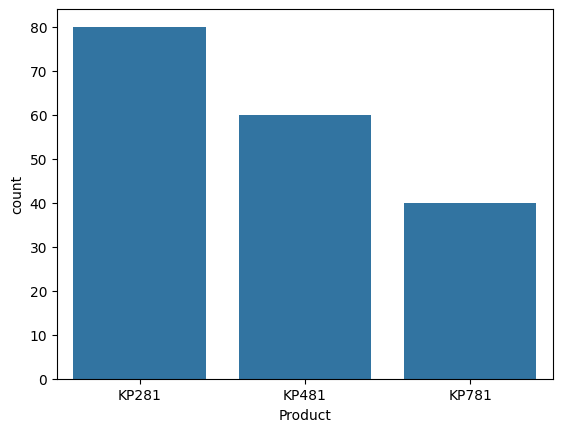

In [81]:
sns.countplot(data=df, x='Product')
#df.Product.value_counts().plot.bar()

<Axes: ylabel='count'>

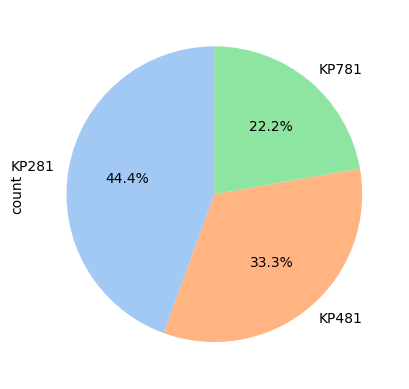

In [82]:
df['Product'].value_counts().plot.pie( 
autopct='%1.1f%%', 
startangle=90, colors=sns.color_palette('pastel'))

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>The KP281 is an entry-level treadmill that sells for $1,500.
<li>The KP481 is for mid-level runners that sell for $1,750.
<li>The KP781 treadmill is having advanced features that sell for $2,500.
<li>We can see that as expected, the cheapest treadmill has the highest sale
<li>Difference between cheapest and mid level treadmill is $250 while that of the top end is $750 more than the mid-level.

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Age column</span>


<Axes: xlabel='Age', ylabel='Count'>

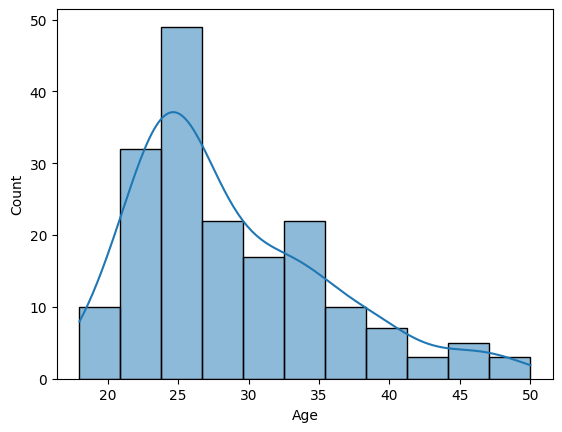

In [83]:
sns.histplot(data=df["Age"], kde=True)
#df["Age"].plot.hist()

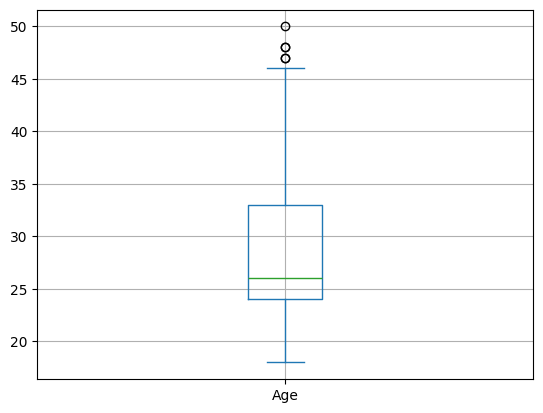

In [84]:
df["Age"].plot.box()
plt.grid()

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>Most customers are in age groups 24-33
<li>Min age is 18 ,max is 50. 

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Gender column</span>


<Axes: ylabel='count'>

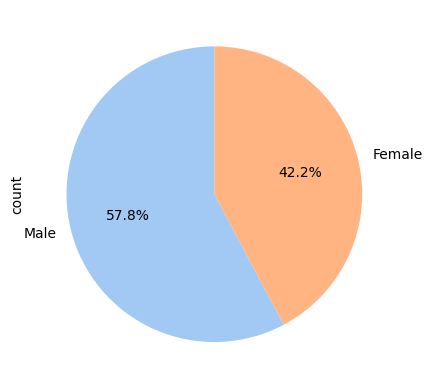

In [85]:
#sns.countplot(data=df, x='Gender')
df['Gender'].value_counts().plot.pie( 
autopct='%1.1f%%', 
startangle=90, colors=sns.color_palette('pastel'))



<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>The ratio of men and women in customers is not very skewed towards one gender with count of men just 15% more than women.  However it will be useful to see MaritalStatus too, as it can be assumed that a household will buy only one machine and it may be used by both genders in the family

<Axes: xlabel='Gender', ylabel='count'>

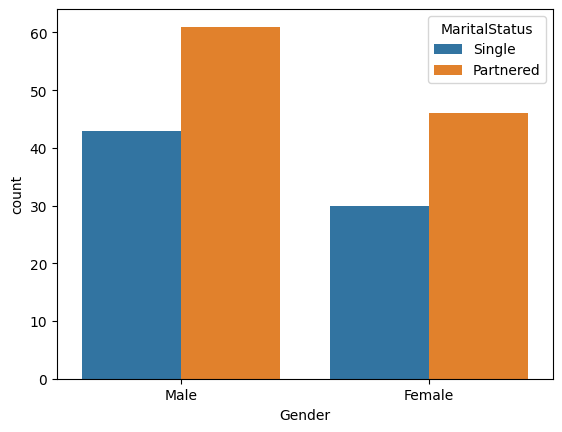

In [86]:
sns.countplot(data=df, x='Gender', hue='MaritalStatus')

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of MaritalStatus column</span>


<Axes: ylabel='count'>

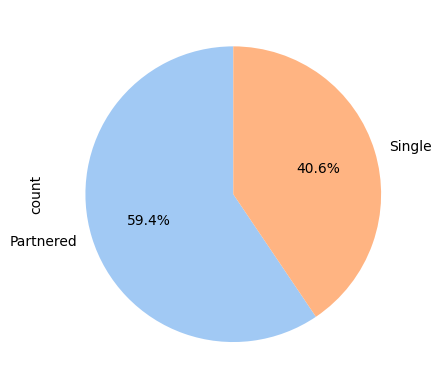

In [87]:
#df.MaritalStatus.plot.hist()
#sns.countplot(data=df, x='MaritalStatus')
df['MaritalStatus'].value_counts().plot.pie( 
autopct='%1.1f%%', 
startangle=90, colors=sns.color_palette('pastel'))


<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>60% of customers are from partnered households

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Education column</span>


[Text(12, 0, 'High School'),
 Text(14, 0, 'UnderGraduate'),
 Text(16, 0, 'Graduate'),
 Text(18, 0, 'PostGrad'),
 Text(20, 0, 'Doctoral')]

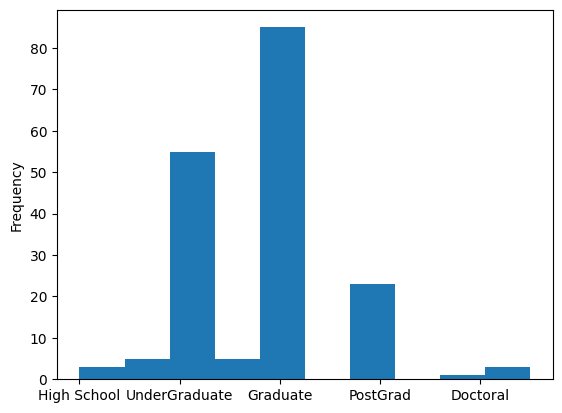

In [88]:
ax = df.Education.plot.hist()
ax.set_xticks([12, 14, 16, 18,20])
ax.set_xticklabels(['High School', 'UnderGraduate', 'Graduate', 'PostGrad', 'Doctoral'])

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>Customers are mostly graduates (16 yrs of education) or undergrads.

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Usage column</span>


<Axes: xlabel='Usage', ylabel='count'>

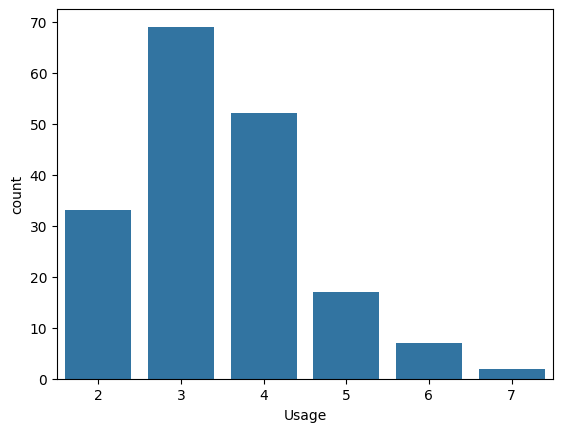

In [89]:
sns.countplot(data=df, x='Usage')

<Axes: ylabel='count'>

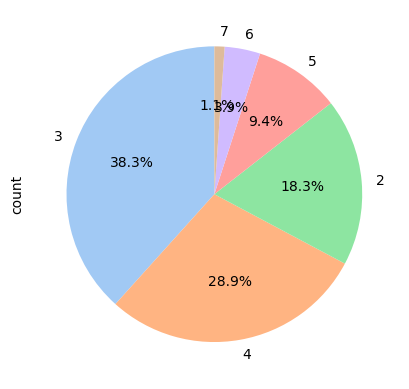

In [90]:
df['Usage'].value_counts().plot.pie( 
autopct='%1.1f%%', 
startangle=90, colors=sns.color_palette('pastel'))

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>38% people use treadmills 3 times a week
<li>67% people use treadmills 3 or 4 times a week
<li>85% people use treadmills 2,3 or 4 times a week

<Axes: ylabel='Frequency'>

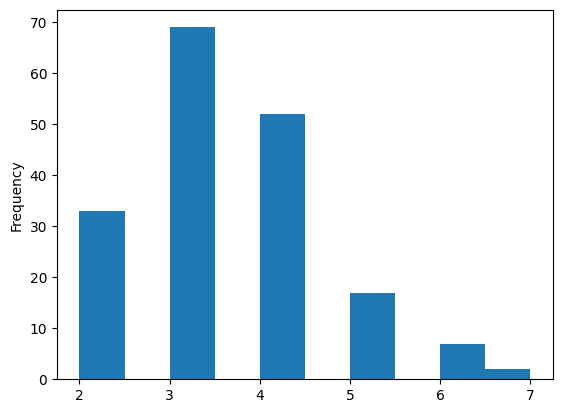

In [91]:
df.Usage.plot.hist()

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Fitness column</span>


In [92]:
df['Fitness'].value_counts().sort_index()

Fitness
1     2
2    26
3    97
4    24
5    31
Name: count, dtype: int64

<Axes: ylabel='count'>

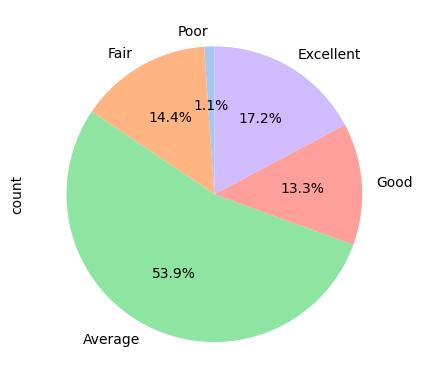

In [93]:
#sns.countplot(data=df, x='Fitness')
df['Fitness'].value_counts().sort_index().plot.pie( 
autopct='%1.1f%%', 
startangle=90, colors=sns.color_palette('pastel'),
labels=["Poor",'Fair','Average','Good','Excellent']
)

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>54% people consider themselves as Average
<li>Only 1% of the customers consider themselves having poor shape


<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Income column</span>


<Axes: ylabel='Frequency'>

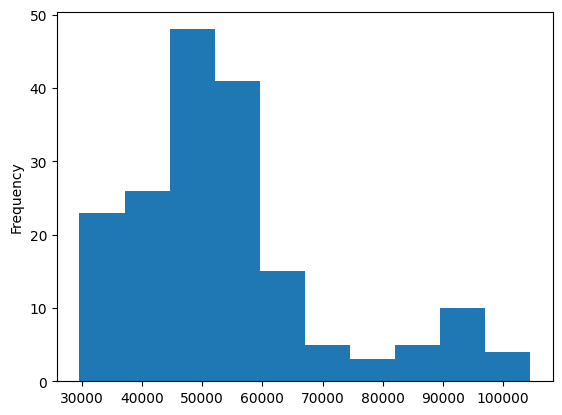

In [94]:
df.Income.plot.hist()

In [95]:
df.Income 

0       29562
1       31836
2       30699
3       32973
4       35247
        ...  
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, Length: 180, dtype: int64

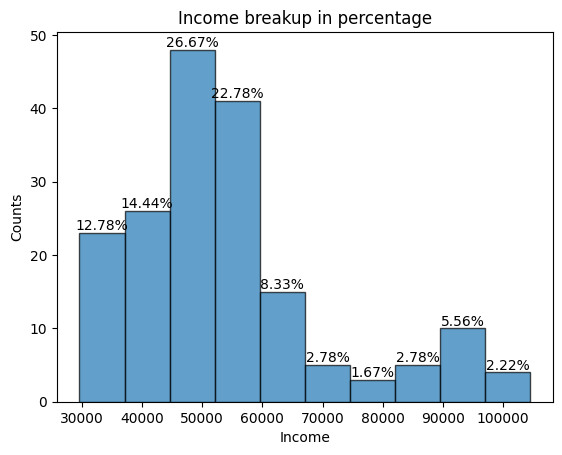

In [96]:
data=df.Income  #Just change this, rest of the code is reusable !

# Create the histogram
counts, bins, patches = plt.hist(data, bins=10, edgecolor='black', alpha=0.7)

# Calculate percentages
total_counts = sum(counts)
percentages = [(count / total_counts) * 100 for count in counts]

# Annotate each bar with the percentage
for count, bin_edge, percentage in zip(counts, bins, percentages):
    height = count
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel(data.name)
plt.ylabel('Counts')
plt.title(f'{data.name} breakup in percentage')

# Show the plot
plt.show()


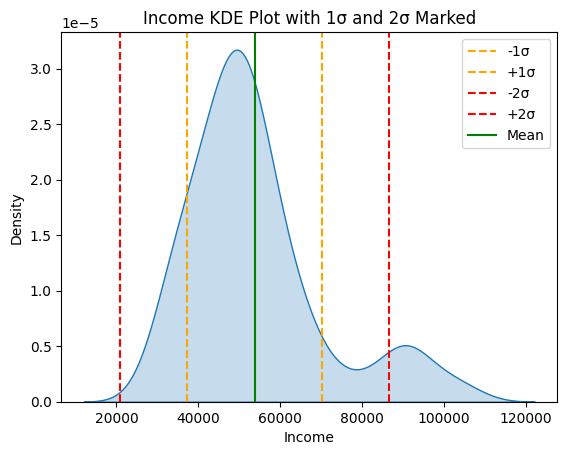

In [97]:
data=df.Income  #Just change this, rest of the code is reusable !

mean = np.mean(data)
std_dev = np.std(data)
one_sigma = [mean - std_dev, mean + std_dev]
two_sigma = [mean - 2*std_dev, mean + 2*std_dev]
sns.kdeplot(data, fill=True)

# Mark one sigma range
plt.axvline(one_sigma[0], color='orange', linestyle='--', label='-1σ')
plt.axvline(one_sigma[1], color='orange', linestyle='--', label='+1σ')

# Mark two sigma range
plt.axvline(two_sigma[0], color='red', linestyle='--', label='-2σ')
plt.axvline(two_sigma[1], color='red', linestyle='--', label='+2σ')

# Mark the mean
plt.axvline(mean, color='green', linestyle='-', label='Mean')

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel(data.name)
plt.ylabel('Density')
plt.title(f'{data.name} KDE Plot with 1σ and 2σ Marked')

# Show the plot
plt.show()


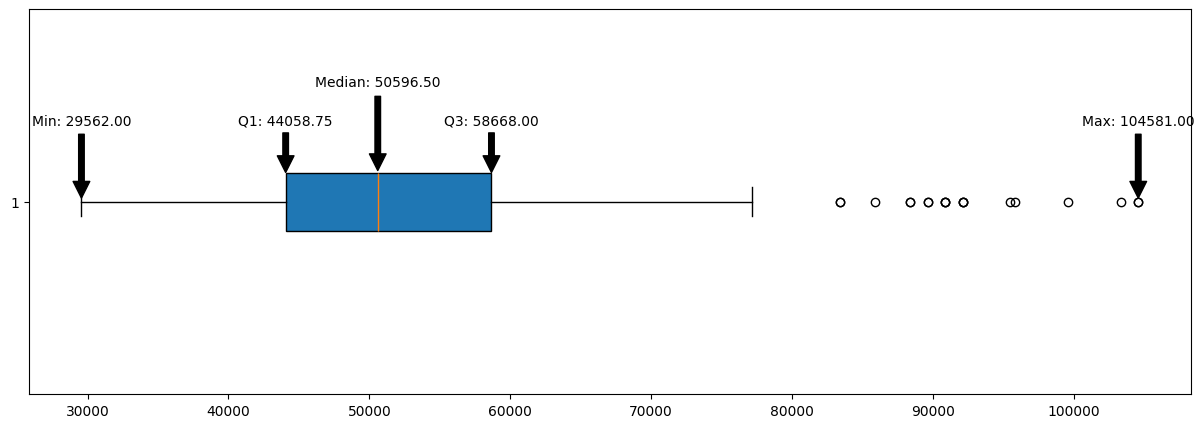

In [98]:
data=df.Income #Only this one line is to be updated

fig, ax = plt.subplots(figsize=(15, 5))
# Create boxplot
boxplot = ax.boxplot(data, vert=False, patch_artist=True)

# Calculate the five-number summary
min_val = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
max_val = np.max(data)

# Annotate the five-number summary on the boxplot
ax.annotate(f'Min: {min_val:.2f}', xy=(min_val, 1), xytext=(min_val, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Q1: {q1:.2f}', xy=(q1, 1.07), xytext=(q1, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Median: {median:.2f}', xy=(median, 1.07), xytext=(median, 1.3),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Q3: {q3:.2f}', xy=(q3, 1.07), xytext=(q3, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Max: {max_val:.2f}', xy=(max_val, 1), xytext=(max_val, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Display plot
plt.show()


<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>50% of customers have income between $44000 and $58000 
<li> Only 14% customers have income greater than $70000

<span style="font-size:30px; font-family:Arial;color:orange">Analysis of Miles column</span>


<Axes: ylabel='Frequency'>

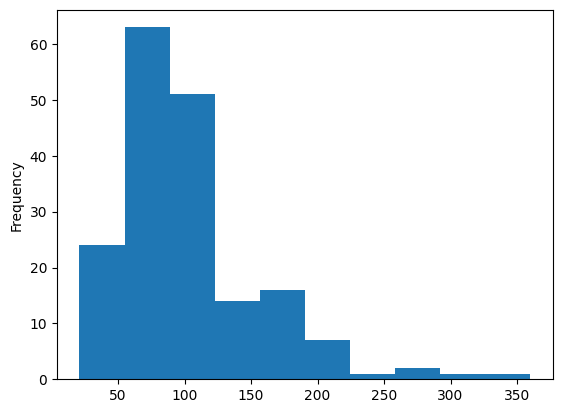

In [99]:
data=df.Miles
data.plot.hist()

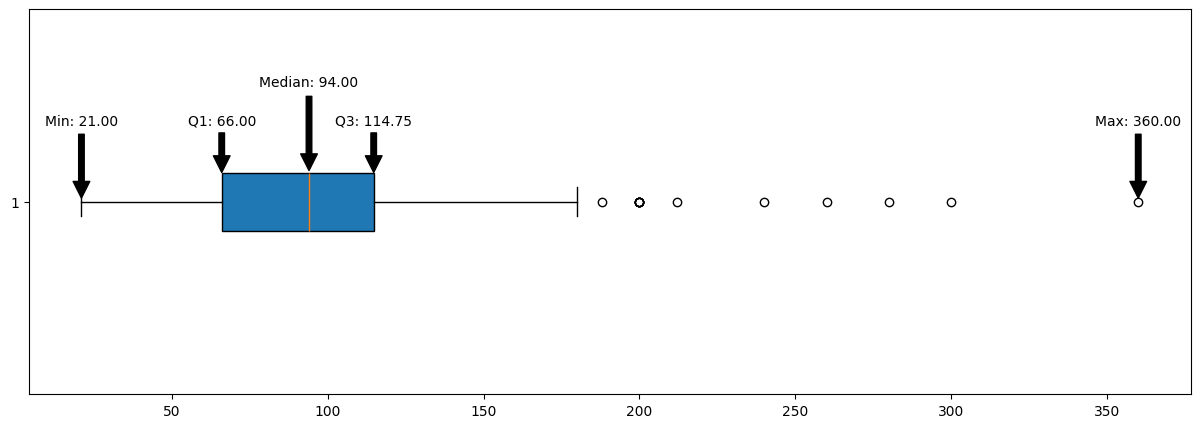

In [100]:
data=df.Miles #Only this one line is to be updated

fig, ax = plt.subplots(figsize=(15, 5))
# Create boxplot
boxplot = ax.boxplot(data, vert=False, patch_artist=True)

# Calculate the five-number summary
min_val = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
max_val = np.max(data)

# Annotate the five-number summary on the boxplot
ax.annotate(f'Min: {min_val:.2f}', xy=(min_val, 1), xytext=(min_val, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Q1: {q1:.2f}', xy=(q1, 1.07), xytext=(q1, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Median: {median:.2f}', xy=(median, 1.07), xytext=(median, 1.3),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Q3: {q3:.2f}', xy=(q3, 1.07), xytext=(q3, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

ax.annotate(f'Max: {max_val:.2f}', xy=(max_val, 1), xytext=(max_val, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Display plot
plt.show()


<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>Number of miles depends upon how long the person is having the treadmill and how often they use it. 
<li>Still we can say that 75% of the customers of Aerofit have not used their treadmills for more than 114 miles
<li>7 out of 180 customers have used for more than 200 miles, with the maximum at 360 miles


In [101]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,ProductCode,MaritalStatus_num,IncomeGroup,AgeGroup,EducationGroup
0,KP281,18,Male,14,Single,3,4,29562,112,1,1,Less than 60k,Less than 24,UnderGraduate
1,KP281,19,Male,15,Single,2,3,31836,75,1,1,Less than 60k,Less than 24,Graduate
2,KP281,19,Female,14,Partnered,4,3,30699,66,1,2,Less than 60k,Less than 24,UnderGraduate
3,KP281,19,Male,12,Single,3,3,32973,85,1,1,Less than 60k,Less than 24,High School
4,KP281,20,Male,13,Partnered,4,2,35247,47,1,2,Less than 60k,Less than 24,UnderGraduate


<span style="font-size:30px; font-family:Arial;color:orange">Bivariate Analysis

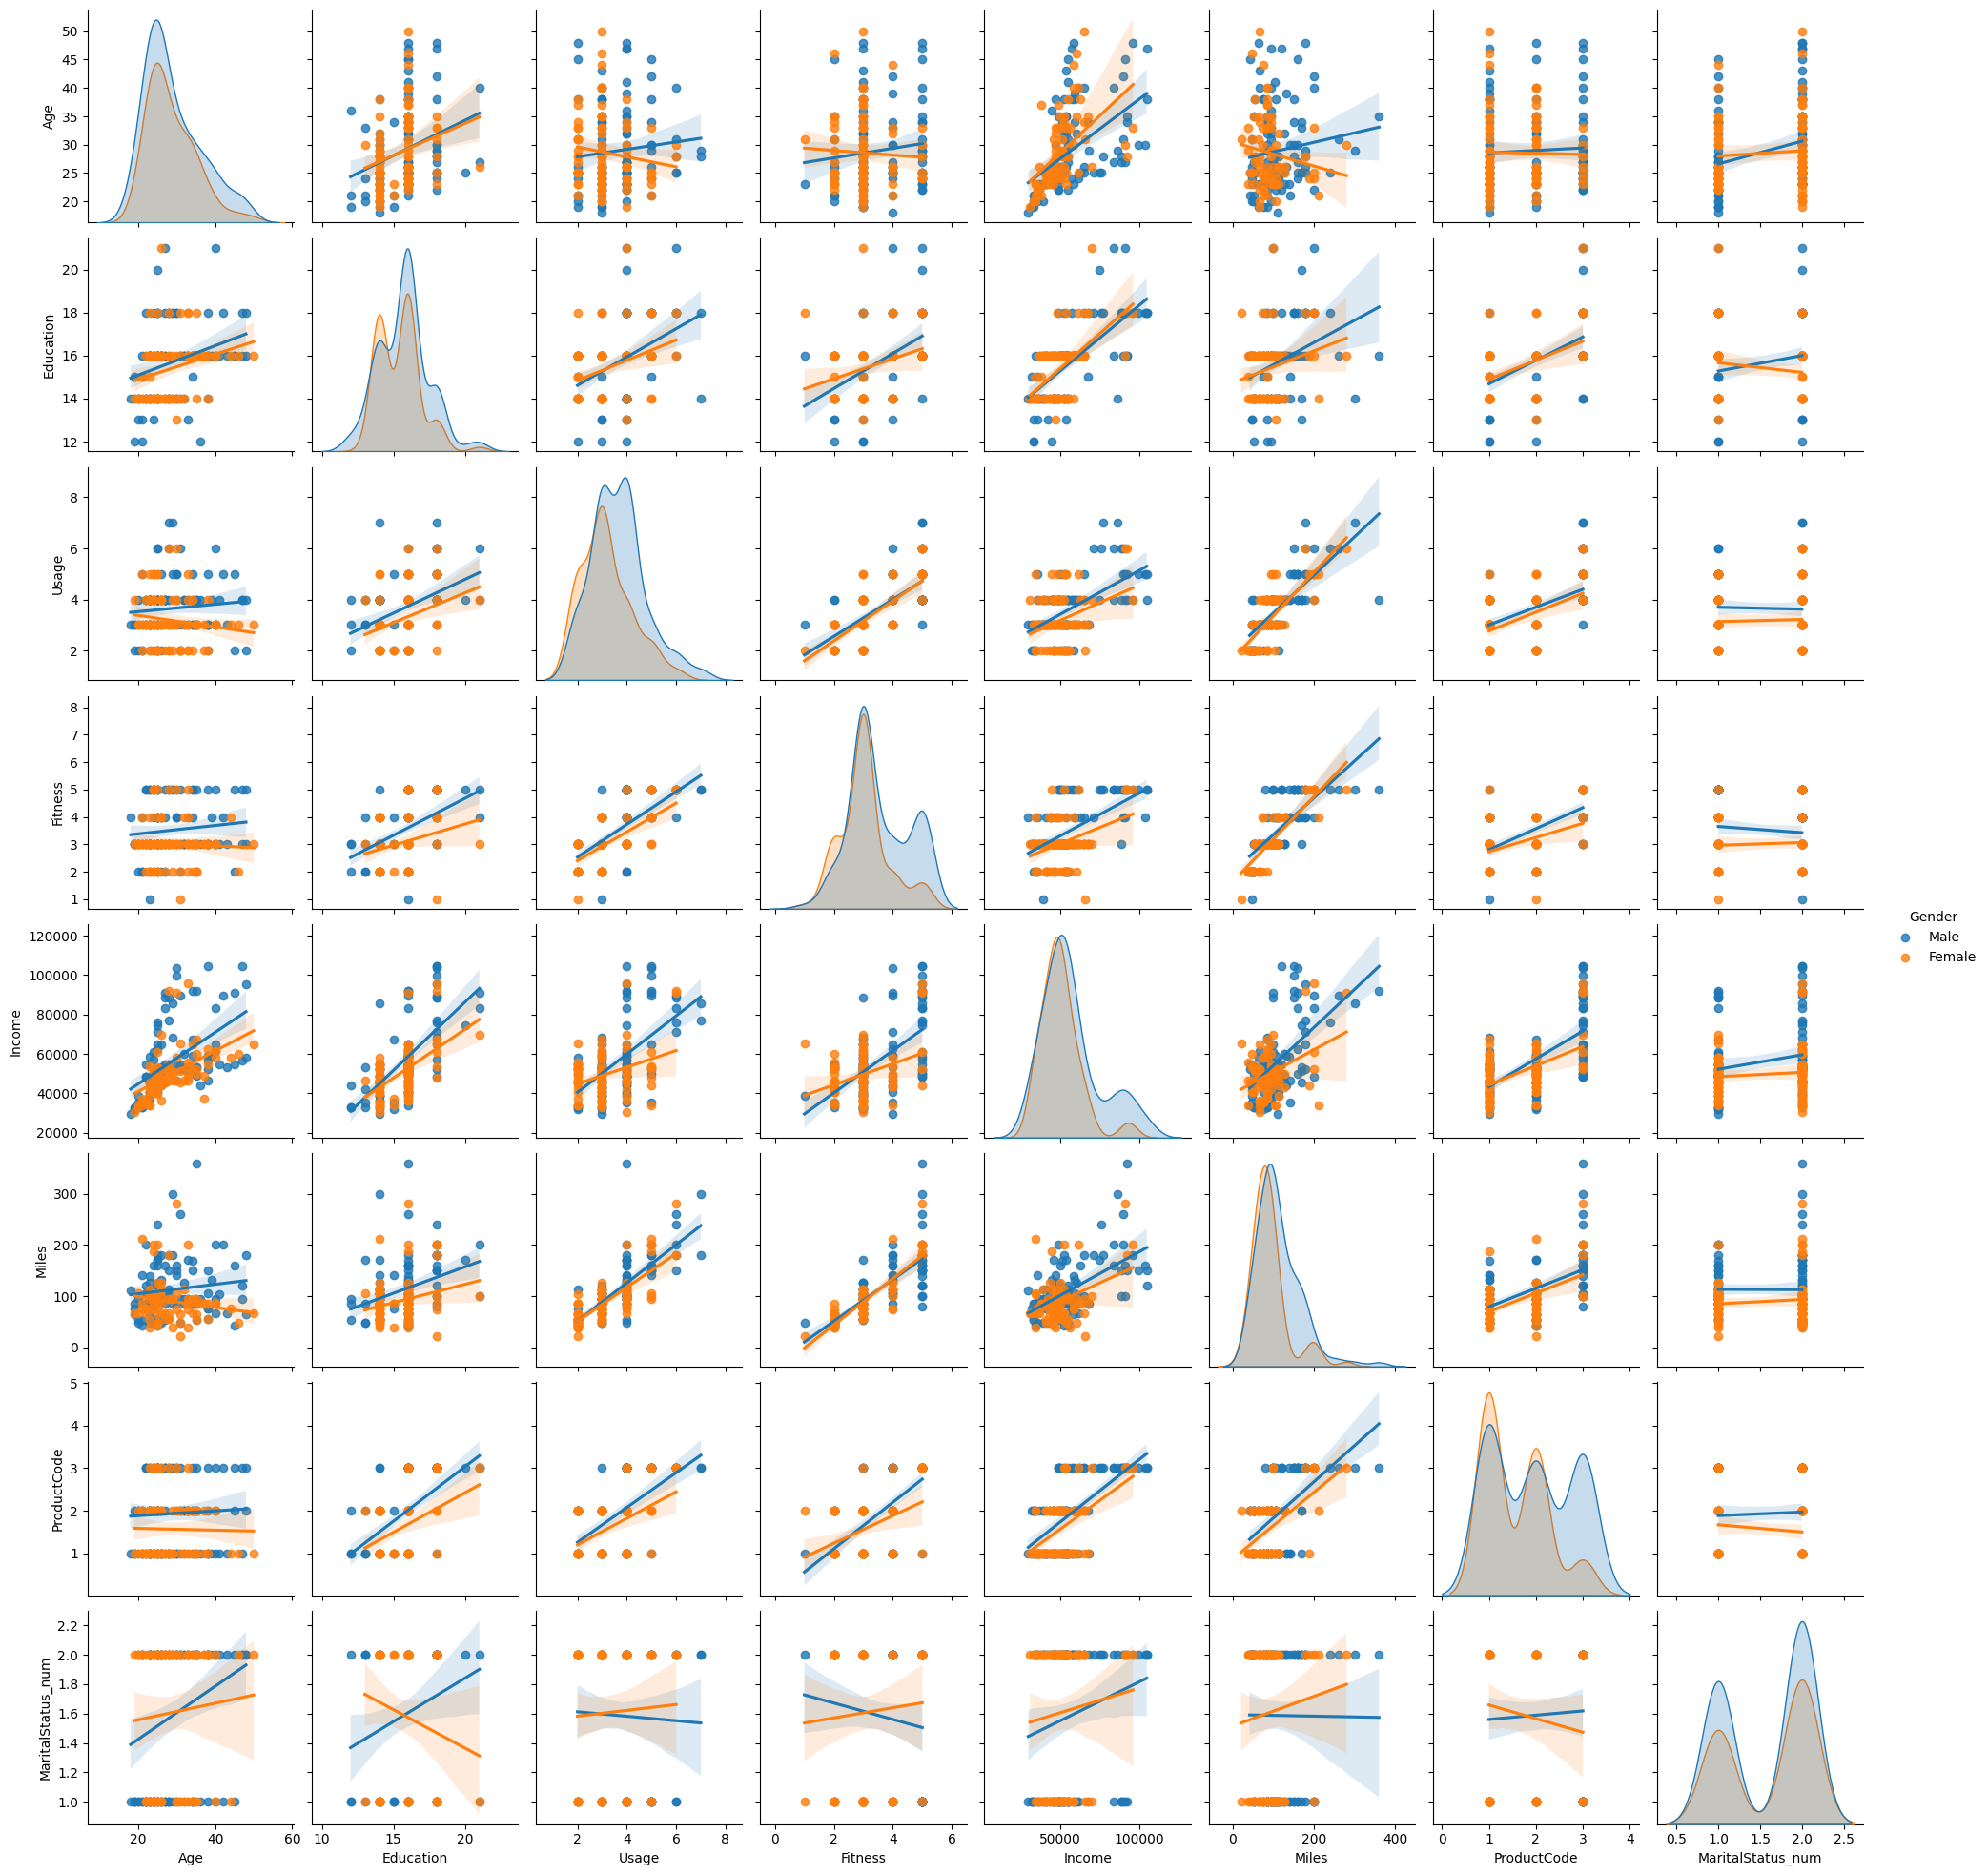

In [102]:
g =sns.pairplot(data=df, hue='Gender', kind='reg')

<Axes: xlabel='Product', ylabel='Age'>

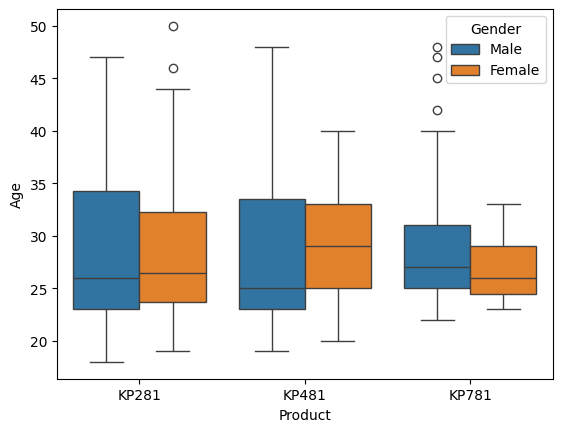

In [103]:
sns.boxplot(data=df, x='Product', y='Age', hue='Gender')

<Axes: xlabel='Product', ylabel='Age'>

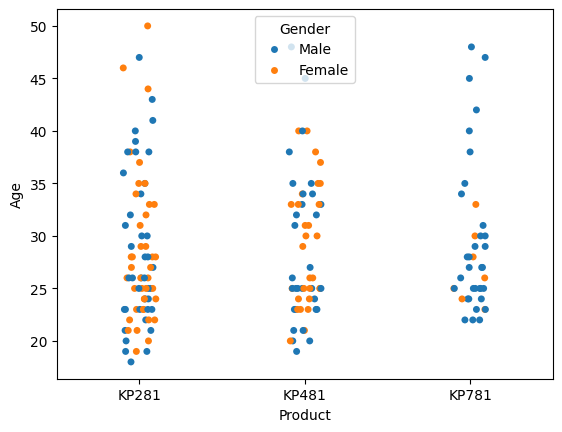

In [104]:
#Plotting a stripplot on same set of data to further confirm hypothesis related to men above 35 buying KP781
sns.stripplot(data= df, x='Product', y='Age', hue='Gender')


<span style="font-size:15px; font-family:Arial;color:#8DDBF2">
<p><li><span style="font-size:15px; font-family:Arial;color:orange">ProductCode distribution </span>- shows Men are more likely to buy the KP781
<li><span style="font-size:15px; font-family:Arial;color:orange">Product Age Gender boxplot and StripPlot</span> shows above the age of 35, KP781 is bought exclusively by men

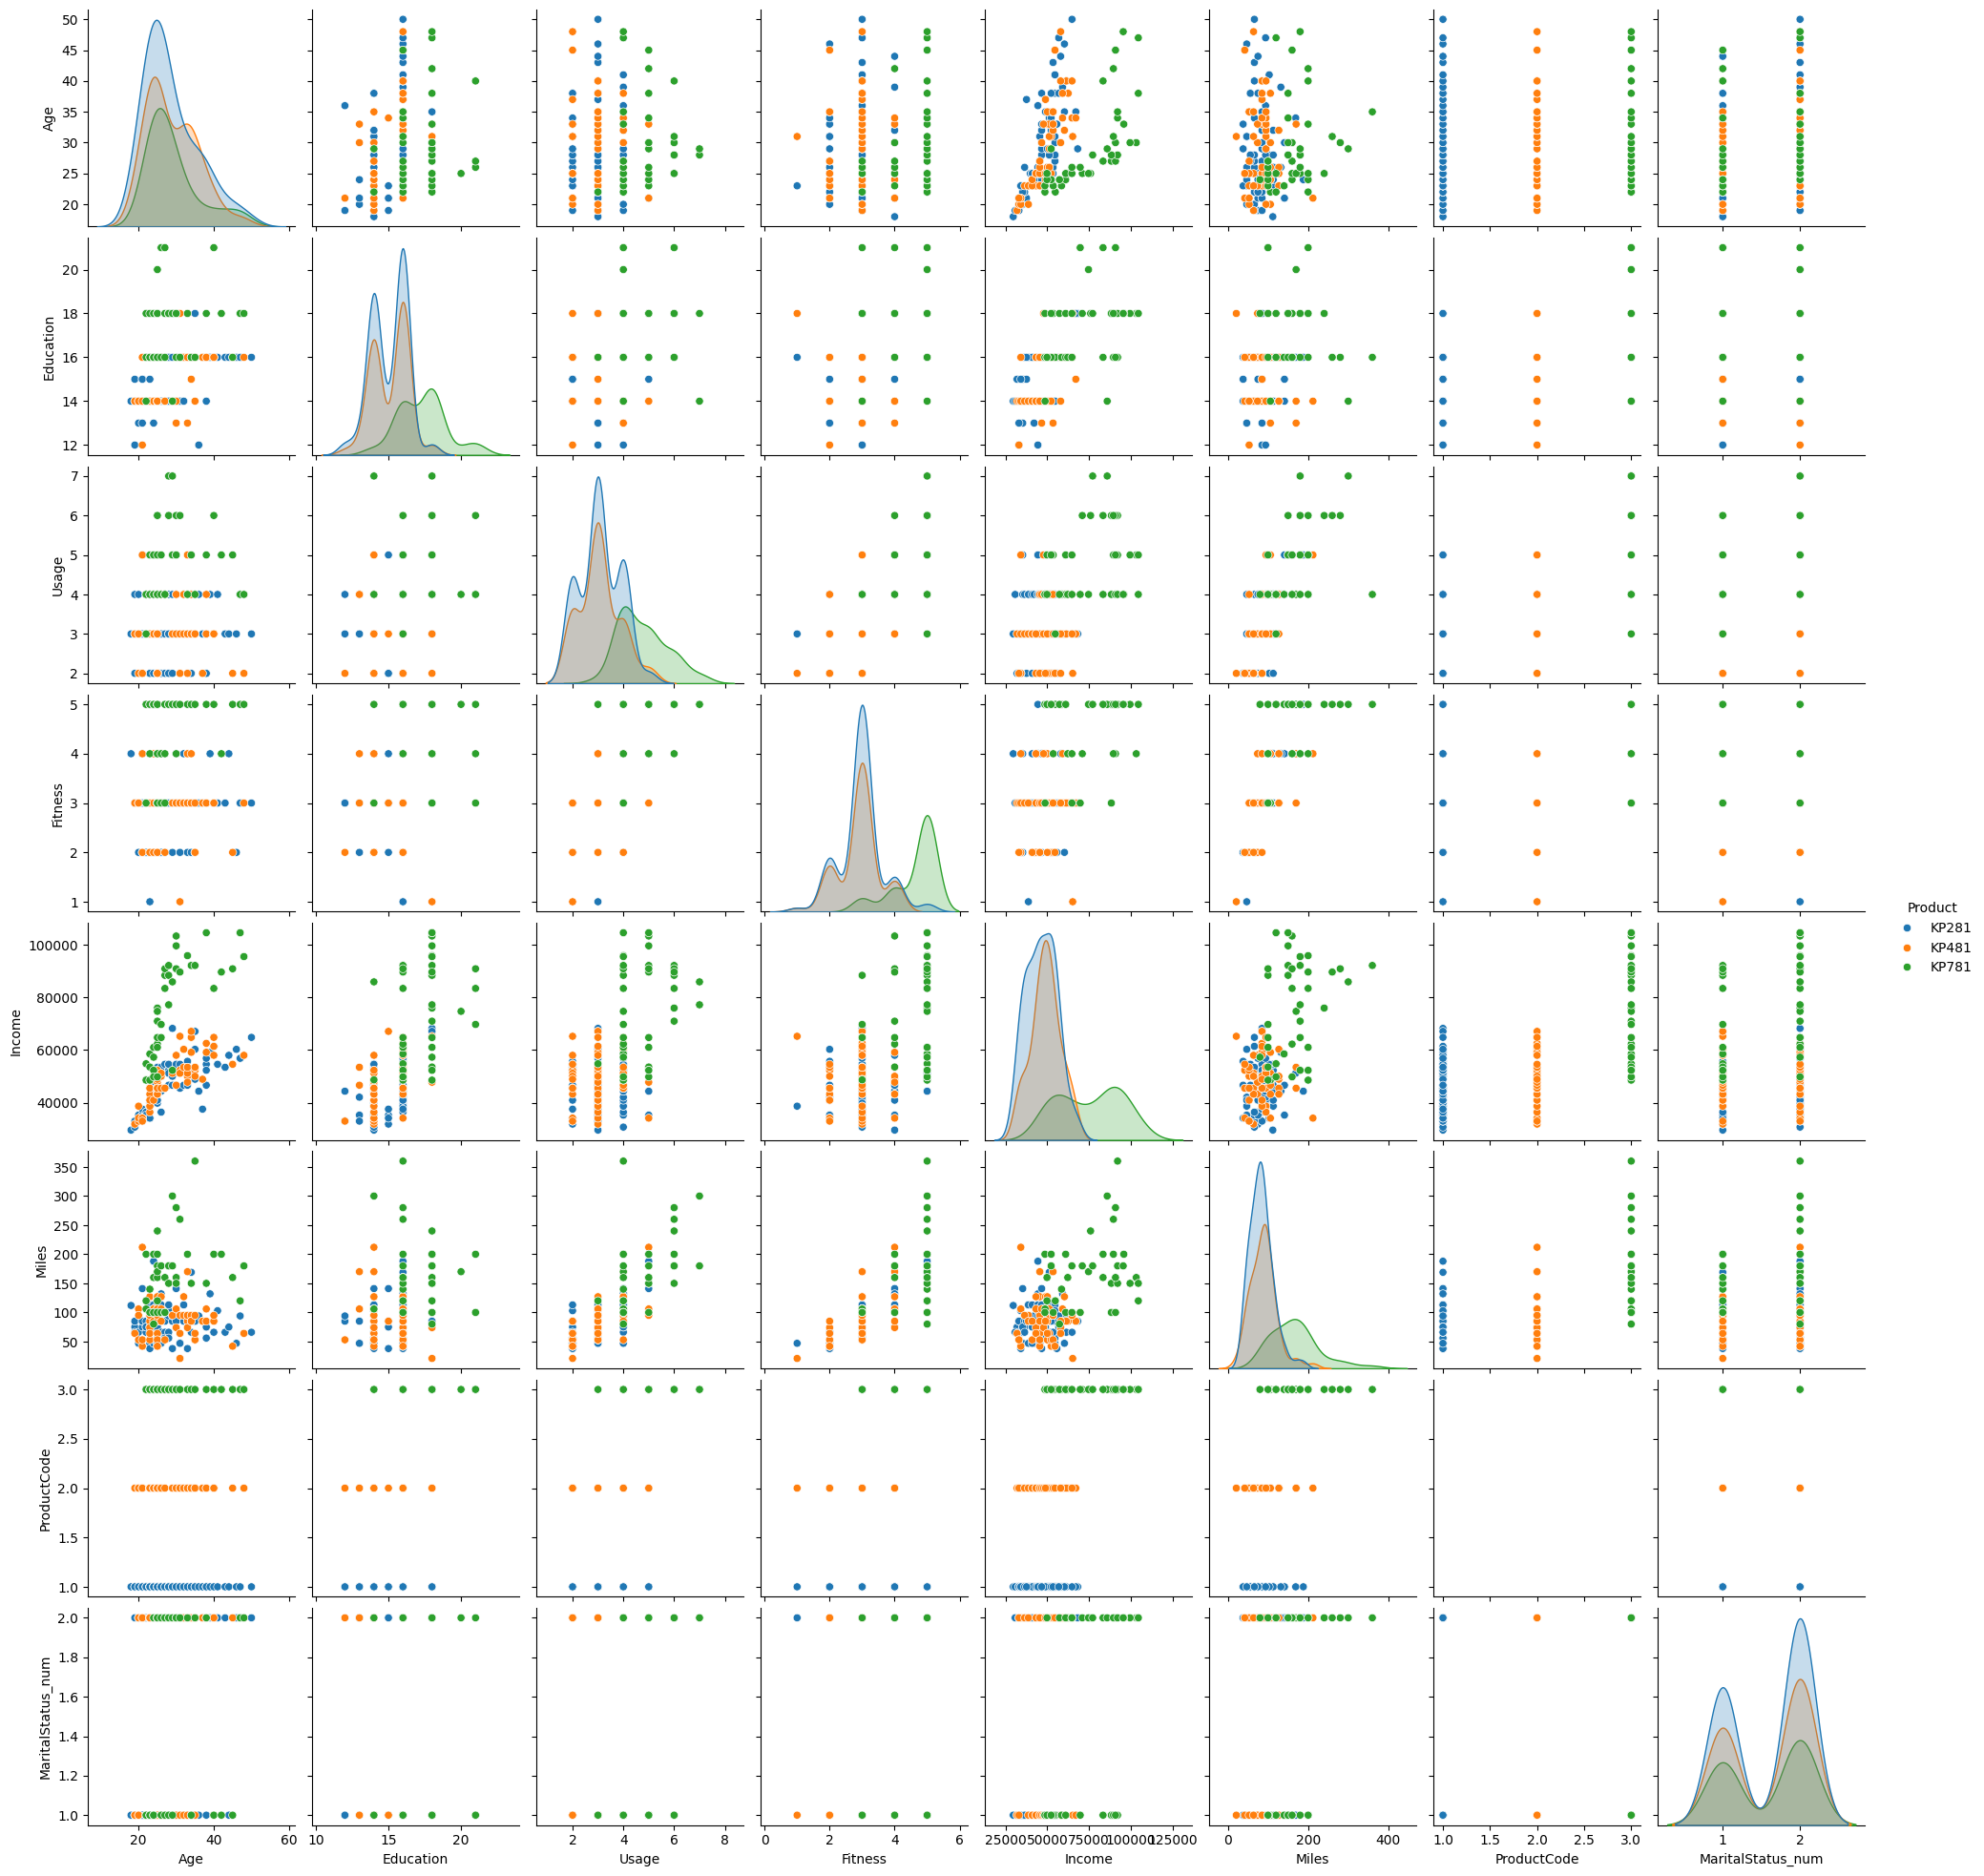

In [105]:
sns.pairplot(data=df, hue='Product')

<span style="font-size:15px; font-family:Arial;color:#8DDBF2">

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Education Histogram with Product Hue</span>- shows People with higher education level tend to buy the costlier treadmills more
Also, the reverse can be stated as, the costlier treadmills are exclusively bought by people with higer education level.

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Fitness histogram with Product Hue</span>- shows that people who have bought the KP781 rate themselves more fit and also used the treadmills more.

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Fitness x usage plot with Product Hue</span>- shows that people who have bought the costlier treadmills rate themselves more fit and also used the treadmills more.

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Income histogram and many other graphs with product hue</span> show that No customers with less than 75000 income bought the KP781

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Age x income with product hue plot</span>: shows that many people younger than 25 yrs of age but having a higher salary typically go for the KP781 machine

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Usage histogram</span> brings out the fact that costlier treadmills are used more.  This could indicate that they are either easier to use, have more interesting functions.  This can be used to motivate potential customers to invest once in higher model

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Miles x Income</span>- Higher income people typically use the treadmills more.  Maybe the have more time, maybe they are more health conscious.  And they heavily use the KP781 treadmill

<p><li><span style="font-size:15px; font-family:Arial;color:orange">Miles x Income</span>- People with less that 75000 income never buy KP781, however they buy the KP481 and KP281 model equally frequently.

<Axes: xlabel='Product', ylabel='Income'>

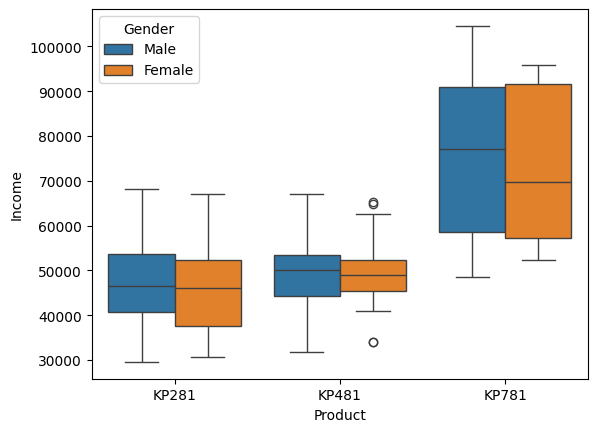

In [106]:
sns.boxplot(data=df, x='Product', y='Income', hue='Gender')

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">This corroborates
<li>People with less that 75000 income never buy KP781
<li>People with less that 75000 income prefer both models - KP481 and KP281 model equally.
<li>Most people with 60K plus salary will go for KP781
</span>

<Axes: xlabel='Product', ylabel='Usage'>

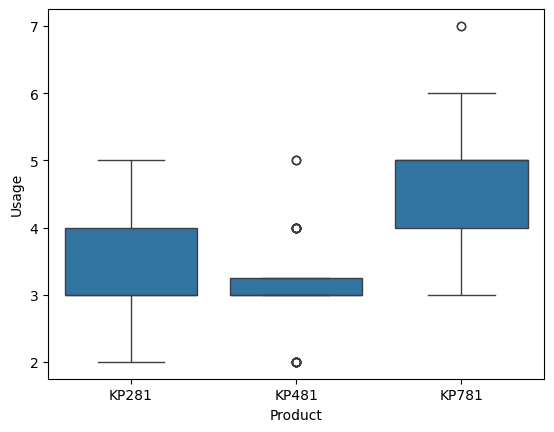

In [107]:
sns.boxplot(data=df, x='Product', y='Usage')

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">This corroborates our analysis that costliest treadmill is used more.  This could indicate that they are either easier to use, have more interesting functions.  This can be used to motivate potential customers that its better to invest in the higher end model as it helps you remain motivated.  

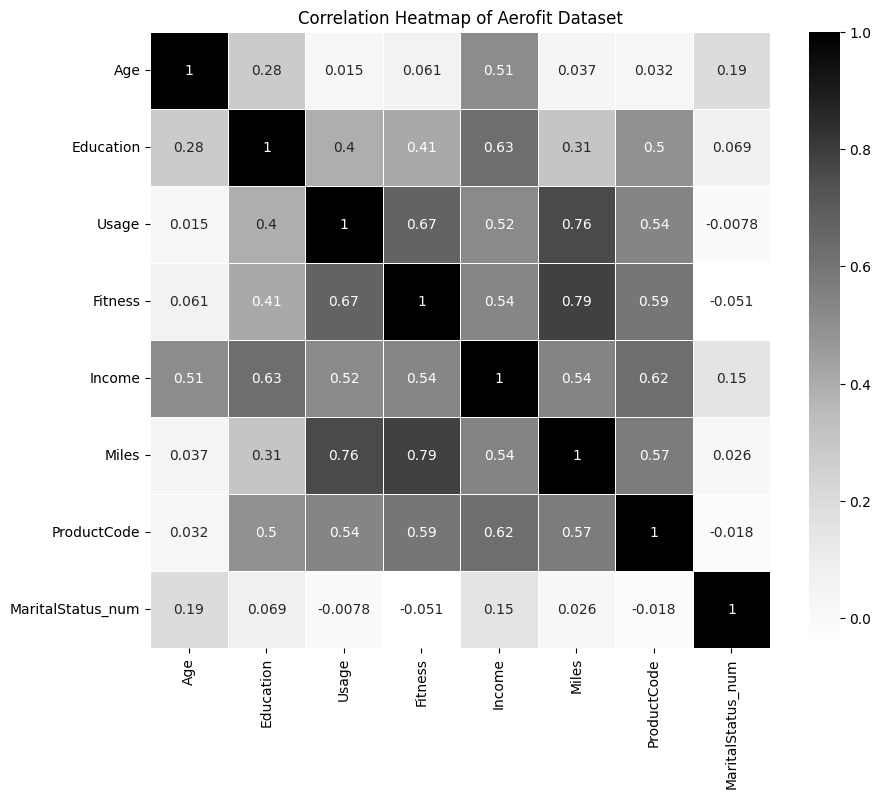

In [108]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)
# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='Greys', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Aerofit Dataset')
plt.show()



<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Mostly the heatmap confirms some of the results we got earlier
<li>Income level and Costlier treadmill are positively correlated
<li>Miles and usage are positively correlated and so is fitness.  So more miles one walks, more is the usage and fitter they feel they are.  
<li>Income and Education are positively correlated.
</span>

<span style="font-size:15px; font-family:Arial;color:orange">
Not all given fields are equally important when it comes to helping the Aerofit sales rep recommend the right treadmill.

So here we create a map of all the fields and then select the fields that an Aerofit sales rep can <i>really</i> use to identify which treadmill to recommend to customer
<li>Gender
<li>Age
<li>Income
<li>Marital Status
<li>Education

Thus we are able to ignore following fields which have lesser relevance when it comes to deciding which treadmill to pitch to a potential customer
<li>Fitness
<li>Miles
<li>Usage
We will do deeper analysis of these fields.
<br>
<br>
Also we make a distinction among the "decision making fields".  When a customer walks in, while we know their gender and can probably guess their agegroup (less than 24, 24-35, 35+), guessing their income, marital status and eduction can be tricky.

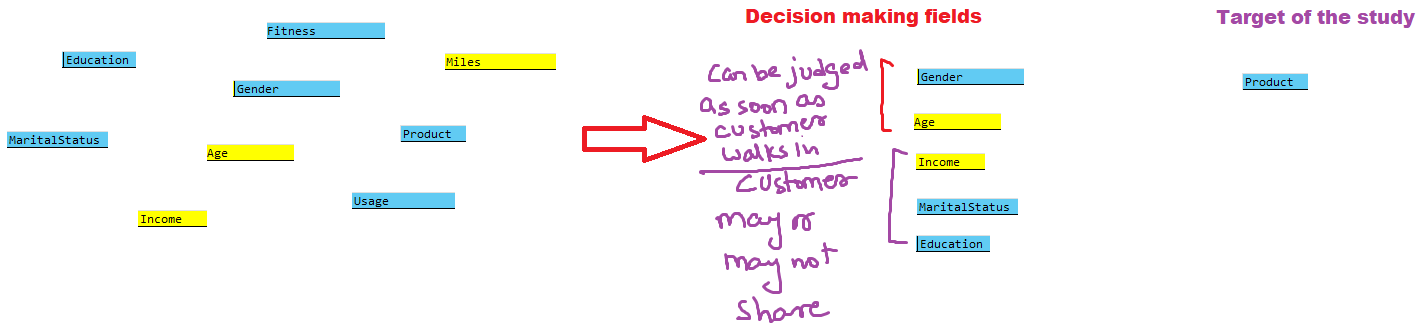

In [109]:
#############################################################################################################################################
#Trying to automate the cross tab analysis

# Define some ANSI color codes
RESET = "\033[0m"
RESET_ALL = "\033[0m"  # Reset all colors and styles

RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"
PURPLE = "\033[35m"
CYAN = "\033[36m"
BLACK = "\033[30m"
BRIGHT_MAGENTA = "\033[95m"

BG_BRIGHT_YELLOW = "\033[103m"
BG_CYAN = "\033[46m"

# # Print colored text
# print(f"{RED}This text is red!{RESET}")
# print(f"{GREEN}This text is green!{RESET}")
# print(f"{BLUE}This text is blue!{RESET}")
# print(f"{YELLOW}Warning message{RESET}")
# print(f"{RED}Error message{RESET}")
# print(f"{BG_BRIGHT_YELLOW}{BLACK}This is black text on yellow background{RESET_ALL}")

import re
def extract_E_H(str):
    # Define the regular expression pattern
    #print(str)
    pattern = r"P\((.*?)\|(.*?)\)"
    # Use re.search() to find matches
    matches = re.search(pattern, str)
    if matches:
        E_value = matches.group(1)
        H_value = matches.group(2)
        return E_value,H_value
    else:
        return "Dependent","Given"

#print(extract_E_H("P(KP781|Less than 60k)"))

#############################################################################################################################################
def printprob(probstr,value, printDetails=False, conditionStr="Field1", effectStr="Field2"):
    probPercentage=f'{round(value*100,2)}% chance'
    if(printDetails):
        print(f"{probstr}: {round(value*100,2)}%")
    Dependent,Given = extract_E_H(probstr)   
    print(f'{BRIGHT_MAGENTA}If {conditionStr} is {Given}, there is {probPercentage} {effectStr} {Dependent}{RESET_ALL}')

#############################################################################################################################################
from scipy.stats import chi2_contingency
#Chi square independence test
def chisquareTest(crosstab,alpha=0.05):
    
    rows=[]
    #print(crosstab)

    for row_index in crosstab.index.drop('All'):
        row=[]
        E=row_index
        for col_name in crosstab.columns.drop('All'):
            H=col_name
            row.append(crosstab.at[E,H])
        rows.append(row)
    _, pvalue,*_=chi2_contingency(rows)
    if(pvalue<alpha):
        return f'{crosstab.index.name} and {crosstab.columns.name} are statistically dependent at {alpha*100}% significance level as ChiSquare Independence test gives a p-value of {pvalue} '
    else:
        return f'{crosstab.index.name} and {crosstab.columns.name} are statistically independent  at {alpha*100}% significance level as ChiSquare Independence test gives a p-value of {pvalue} '
#############################################################################################################################################

def DoCrossTabAnalysis(field1, field2, printDetails=False, conditionStr="Field1", effectStr="Field2"):

    crosstab = pd.crosstab(field1, field2, margins=True)
    print(f"{YELLOW}Cross tab Analysis of {crosstab.index.name} and {crosstab.columns.name}{RESET_ALL}")
    if(printDetails):        
        print(f"{BRIGHT_MAGENTA}{"-"*100}")
        print(crosstab)
        print(f"{BRIGHT_MAGENTA}{"-"*100}{RESET_ALL}")
        print()
        print(f"{YELLOW}Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario{RESET_ALL}")
    crosstab_normalized = pd.crosstab(field1, field2, normalize='columns')
    for row_index in crosstab_normalized.index:
        E=row_index
        for col_name in crosstab_normalized.columns:
            H=col_name
            printprob(f"P({E}|{H})",crosstab.at[E,H]/crosstab.at['All',H],printDetails,conditionStr,effectStr )
        print()
    print(chisquareTest(crosstab))
    
#############################################################################################################################################

In [110]:
DoCrossTabAnalysis(df.Product, df.IncomeGroup, printDetails=True,conditionStr="income",effectStr="the person will go for")

Cross tab Analysis of Product and IncomeGroup
----------------------------------------------------------------------------------------------------
IncomeGroup  Less than 60k  More than 60K  All
Product                                       
KP281                   74              6   80
KP481                   53              7   60
KP781                   11             29   40
All                    138             42  180
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(KP281|Less than 60k): 53.62%
If income is Less than 60k, there is 53.62% chance the person will go for KP281
P(KP281|More than 60K): 14.29%
If income is More than 60K, there is 14.29% chance the person will go for KP281

P(KP481|Less than 60k): 38.41%
If income is Less than 60k, there is 38.41% chance the person will go for KP481
P(KP481|More than 60K): 16

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>If income is less than 60K, there is only 8% chance the person will go for KP781
<li>If income is less than 60K, there is 53% chance the person will go for KP281
<li>If income is more than 60K, there is 69% chance the person will go for KP781

In [111]:
DoCrossTabAnalysis(df.Product, df.Gender, printDetails=True,conditionStr="customer",effectStr="they will go for")



Cross tab Analysis of Product and Gender
----------------------------------------------------------------------------------------------------
Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(KP281|Female): 52.63%
If customer is Female, there is 52.63% chance they will go for KP281
P(KP281|Male): 38.46%
If customer is Male, there is 38.46% chance they will go for KP281

P(KP481|Female): 38.16%
If customer is Female, there is 38.16% chance they will go for KP481
P(KP481|Male): 29.81%
If customer is Male, there is 29.81% chance they will go for KP481

P(KP781|Female): 9.21%
If customer is Female, there is 9.21% chance they will go for KP781
P(KP781|Male): 31.73%
If cus

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>If customer is a female, there is only 9.2% chance they will go for KP781
<li>If customer is a female, there is 52% chance they will go for KP281
<li>If customer is Male, there is 38.46% chance they will go for KP281, 29.81% chance they will go for KP481 and 31.73% chance they will go for KP781

In [112]:
DoCrossTabAnalysis(df.Product, df.AgeGroup, printDetails=True,conditionStr="age",effectStr="the person will go for")

Cross tab Analysis of Product and AgeGroup
----------------------------------------------------------------------------------------------------
AgeGroup  Less than 24  24-35  36 and above  All
Product                                         
KP281               27     39            14   80
KP481               17     35             8   60
KP781               10     24             6   40
All                 54     98            28  180
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(KP281|Less than 24): 50.0%
If age is Less than 24, there is 50.0% chance the person will go for KP281
P(KP281|24-35): 39.8%
If age is 24-35, there is 39.8% chance the person will go for KP281
P(KP281|36 and above): 50.0%
If age is 36 and above, there is 50.0% chance the person will go for KP281

P(KP481|Less than 24): 31.48%
If age is Less than 24

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>If age < 24, there is only 18% chance they will go for KP781
<li>If age < 24, there is 82% chance they will go for KP281 or KP481
<li>If age > 36, there is 50% chance they will go for KP281
<li>If age is between 24-35, there is 75% chance they will go for KP281 or KP481

In [113]:
DoCrossTabAnalysis(df.AgeGroup, df.IncomeGroup, printDetails=True,conditionStr="income",effectStr="the person will be of age")

Cross tab Analysis of AgeGroup and IncomeGroup
----------------------------------------------------------------------------------------------------
IncomeGroup   Less than 60k  More than 60K  All
AgeGroup                                       
Less than 24             53              1   54
24-35                    69             29   98
36 and above             16             12   28
All                     138             42  180
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(Less than 24|Less than 60k): 38.41%
If income is Less than 60k, there is 38.41% chance the person will be of age Less than 24
P(Less than 24|More than 60K): 2.38%
If income is More than 60K, there is 2.38% chance the person will be of age Less than 24

P(24-35|Less than 60k): 50.0%
If income is Less than 60k, there is 50.0% chance the person will be

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>Chances that a person of age less than 24 having income of 60K is very less, around 2.38%
So there is a 97% chance to find a person having a income above 60k in ages 24 and above 

In [114]:
DoCrossTabAnalysis(df.Gender, df.IncomeGroup, printDetails=True,conditionStr="income",effectStr="the person is a")

Cross tab Analysis of Gender and IncomeGroup
----------------------------------------------------------------------------------------------------
IncomeGroup  Less than 60k  More than 60K  All
Gender                                        
Female                  63             13   76
Male                    75             29  104
All                    138             42  180
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(Female|Less than 60k): 45.65%
If income is Less than 60k, there is 45.65% chance the person is a Female
P(Female|More than 60K): 30.95%
If income is More than 60K, there is 30.95% chance the person is a Female

P(Male|Less than 60k): 54.35%
If income is Less than 60k, there is 54.35% chance the person is a Male
P(Male|More than 60K): 69.05%
If income is More than 60K, there is 69.05% chance the person i

In [115]:
DoCrossTabAnalysis(df.IncomeGroup,df.Gender,  printDetails=True,conditionStr="person",effectStr="the income is")

Cross tab Analysis of IncomeGroup and Gender
----------------------------------------------------------------------------------------------------
Gender         Female  Male  All
IncomeGroup                     
Less than 60k      63    75  138
More than 60K      13    29   42
All                76   104  180
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(Less than 60k|Female): 82.89%
If person is Female, there is 82.89% chance the income is Less than 60k
P(Less than 60k|Male): 72.12%
If person is Male, there is 72.12% chance the income is Less than 60k

P(More than 60K|Female): 17.11%
If person is Female, there is 17.11% chance the income is More than 60K
P(More than 60K|Male): 27.88%
If person is Male, there is 27.88% chance the income is More than 60K

IncomeGroup and Gender are statistically independent  at 5.0% signif

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>We are more likely (27%) to find a male with income greater than 60K than a female (17.11%)

In [116]:
DoCrossTabAnalysis(df.IncomeGroup,df.EducationGroup,  printDetails=True,conditionStr="person",effectStr="the income is")

Cross tab Analysis of IncomeGroup and EducationGroup
----------------------------------------------------------------------------------------------------
EducationGroup  High School  UnderGraduate  Graduate  PostGrad  Doctoral  All
IncomeGroup                                                                  
Less than 60k             3             59        71         5         0  138
More than 60K             0              1        19        18         1   39
All                       3             60        90        23         1  177
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(Less than 60k|High School): 100.0%
If person is High School, there is 100.0% chance the income is Less than 60k
P(Less than 60k|UnderGraduate): 98.33%
If person is UnderGraduate, there is 98.33% chance the income is Less than 60k
P(Less than 6

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>If person is UnderGraduate, there is 98.33% chance the income is Less than 60k
<li>If person is Graduate, there is 78.89% chance the income is Less than 60k
<li>If person is PostGrad, there is 78.26% chance the income is More than 60K
<li>If person is Doctoral, there is 100.0% chance the income is More than 60K

In [117]:
DoCrossTabAnalysis(df.Product,df.EducationGroup ,  printDetails=True,conditionStr="customer's education level",effectStr="they may buy")

Cross tab Analysis of Product and EducationGroup
----------------------------------------------------------------------------------------------------
EducationGroup  High School  UnderGraduate  Graduate  PostGrad  Doctoral  All
Product                                                                      
KP281                     2             33        43         2         0   80
KP481                     1             25        32         2         0   60
KP781                     0              2        15        19         1   37
All                       3             60        90        23         1  177
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(KP281|High School): 66.67%
If customer's education level is High School, there is 66.67% chance they may buy KP281
P(KP281|UnderGraduate): 55.0%
If customer's education 

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">
<li>If customer's education level is PostGrad or above, there is 8.7% chance they may buy KP281 or KP481
<li>If customer's education level is UnderGraduate, there is only 3.33% chance they may buy KP781
<li>If customer's education level is PostGrad, there is 82.61% chance they may buy KP781
<li>If customer's education level is Doctoral, there is 100.0% chance they may buy KP781

In [118]:
c = pd.crosstab(df.Gender,[df.EducationGroup, df.Product], margins=True)
c

EducationGroup High School       UnderGraduate             Graduate        \
Product              KP281 KP481         KP281 KP481 KP781    KP281 KP481   
Gender                                                                      
Female                   0     0            18    13     0       21    14   
Male                     2     1            15    12     2       22    18   
All                      2     1            33    25     2       43    32   

EducationGroup       PostGrad             Doctoral  All  
Product        KP781    KP281 KP481 KP781    KP781       
Gender                                                   
Female             2        1     2     4        0   75  
Male              13        1     0    15        1  102  
All               15        2     2    19        1  177

In [119]:
DoCrossTabAnalysis(df.Product,df.MaritalStatus ,  printDetails=True,conditionStr="customer's marital status",effectStr="they may buy")

Cross tab Analysis of Product and MaritalStatus
----------------------------------------------------------------------------------------------------
MaritalStatus  Partnered  Single  All
Product                              
KP281                 48      32   80
KP481                 36      24   60
KP781                 23      17   40
All                  107      73  180
----------------------------------------------------------------------------------------------------

Here are all probabilty results. As analyst, you can choose whichever is important as per the given scenario
P(KP281|Partnered): 44.86%
If customer's marital status is Partnered, there is 44.86% chance they may buy KP281
P(KP281|Single): 43.84%
If customer's marital status is Single, there is 43.84% chance they may buy KP281

P(KP481|Partnered): 33.64%
If customer's marital status is Partnered, there is 33.64% chance they may buy KP481
P(KP481|Single): 32.88%
If customer's marital status is Single, there is 32.88% c

<span style="font-size:25px; font-family:Arial;color:#8DDBF2">Not much to separate based on MaritalStatus.  The data is more or less evenly distributed 

<span style="font-size:50px; font-family:Arial;color:red">Business Insights

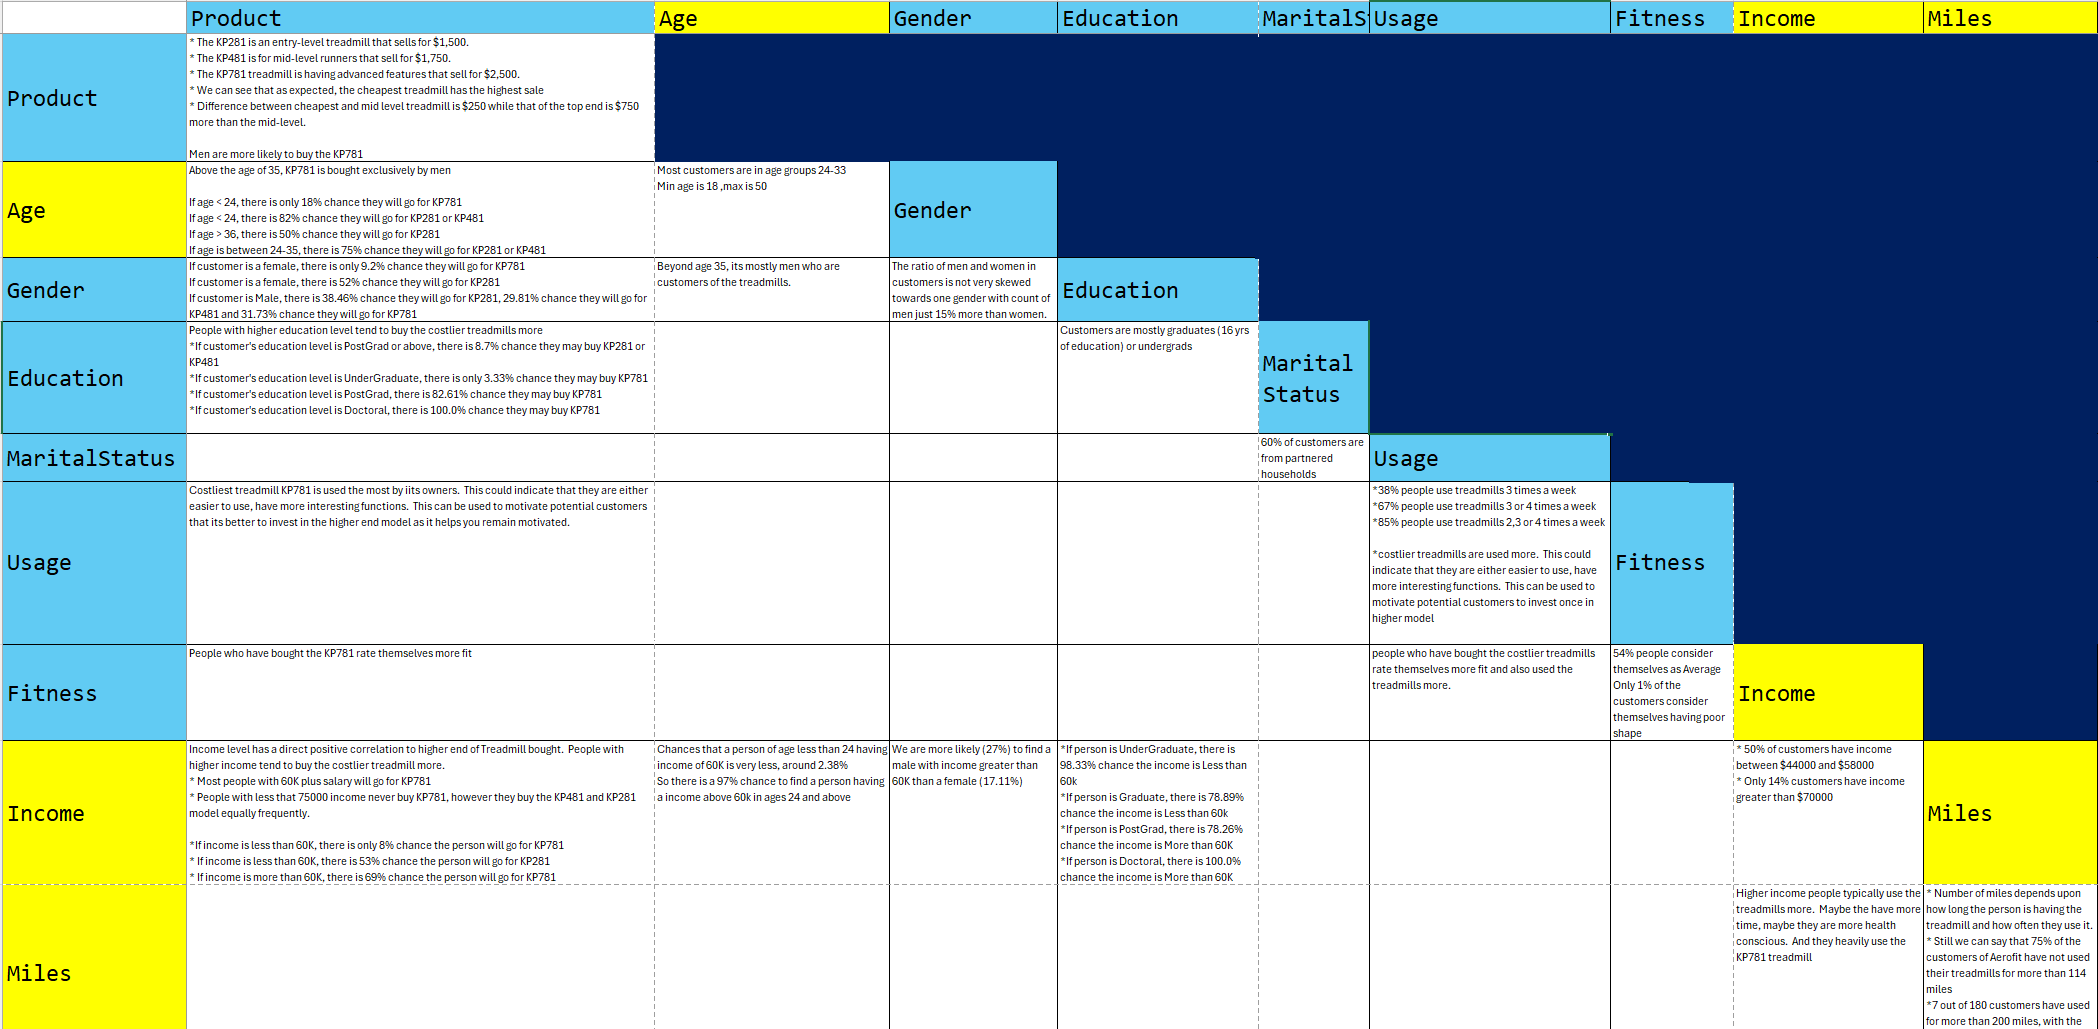

<span style="font-size:50px; font-family:Arial;color:red">Recommendations

<span style="font-size:15px; font-family:Arial;color:#8DDBF2">
Here is a runbook for Aerofit sales representatives when they meet a potential customer

<b>1. Find out customer's Gender, Age. If possible, try to find out Education level and Income level.</b>

Then, on basis on following rules, the representative can decide which treadmill would be best to be pitched to this customer

<span style="color:orange">
<b>Gender</b></span>
If person is a female, do not pitch them KP781 (there is only 9.2% chance they will go for KP781)
<br>

<span style="color:orange">
<b>Age</b></span>
If person is of age less than 24, do not pitch them KP781 (there is only 18% chance they will go for KP781)
<br>

<span style="color:orange">
<b>Education Level</b></span>
If a person is High School, Undergraduate or Graduate, pitch them KP281 and KP481
If a person education level is PostGrad or Doctoral, pitch them KP781 (there is more than 80% of chance of success here)
<br>

<span style="color:orange">
<b>Income Level</b></span>
If a person's income level is less than 60K, pitch them KP281 and KP481 ( there is only 8% chance the person will go for KP781)
If a person education level is PostGrad or Doctoral, pitch them KP781 (there is 69% chance the person will go for KP781)
<br>
<br>
<span style="color:orange">
<b>If none of the conditions are met, then pitch all the treadmills to the customer.</span></b>

Whenever you are pitching KP781, inform the customer in a subtle way that it has been found based on your data that people who buy KP781 tend to use it a lot.  
This treadmill offers ease to use, has more interesting functions (representatives can add more features based on their sales knowledge here.)
<br>
<br>
<span style="color:orange">
The following is a handy decision tree that can be shared with all representatives that codifies the above rules

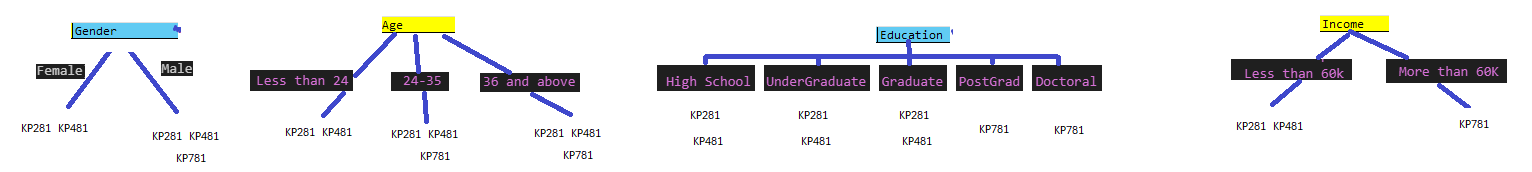

In [120]:
crosstab = pd.crosstab(df.Product,df.MaritalStatus, margins=True)

from scipy.stats import chi2_contingency

#Chi square independence test
rows=[]

print(crosstab)

for row_index in crosstab.index.drop('All'):
    row=[]
    E=row_index
    for col_name in crosstab.columns.drop('All'):
        H=col_name
        row.append(crosstab.at[E,H])
    rows.append(row)
_, pvalue,*_=chi2_contingency(rows)
pvalue
    

MaritalStatus  Partnered  Single  All
Product                              
KP281                 48      32   80
KP481                 36      24   60
KP781                 23      17   40
All                  107      73  180


0.9604745988058153